# Introduction

Talk about the purpose of this stage of data importation and preparation. Quick summary of the topics we will be covering

# 1. Importing data

In [10]:
import numpy as np
import pandas as pd
from IPython.display import *
from ipywidgets import *
from functools import partial

In [2]:
df = pd.read_csv('../Data/dataset.csv', na_values=['#EMPTY?'], delimiter=";")
print(df.head(5))

   id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95

In [3]:
print("Number of unique engine IDs:")
print(df["id"].unique().size)

Number of unique engine IDs:
100


# 2. Data Cleaning

## 2.A. Type Checking

In [4]:
df.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

## 2.B. Null Check

In [5]:
df.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

## 2.C. Data Description

In [6]:
df.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


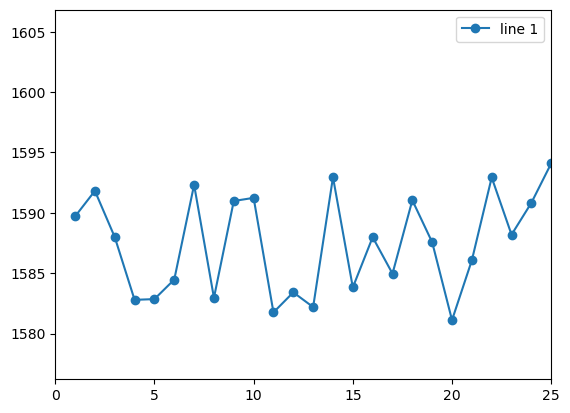

In [7]:
import matplotlib.pyplot as plt

a = df.loc[df['id'] == 1]

# plot lines
plt.plot(a['cycle'], a['s3'], label = "line 1", marker='o')
plt.legend()
plt.xlim(0, 25)
plt.show()

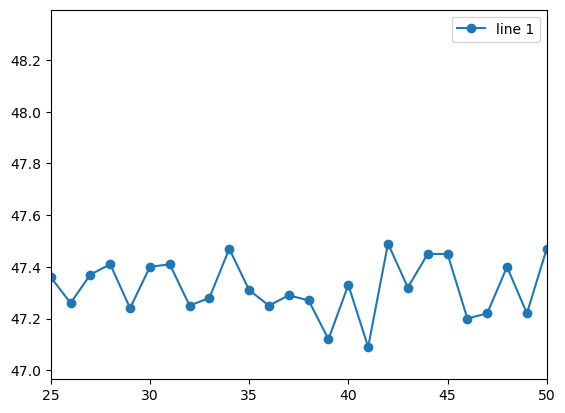

Dropdown(index=15, options=('id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', '…

In [15]:
button_left = Button(description="<<")
button_right = Button(description=">>")
drop_down_values = Dropdown(options = df.columns)
selected_field = drop_down_values.value
drop_down_id = Dropdown(options = df['id'])
selected_id = drop_down_id.value
x_range = [25, 50]

# plot lines
a = df.loc[df['id'] == selected_id]
plt.plot(a['cycle'], a[selected_field], label = "line 1", marker='o')
plt.legend()
plt.xlim(x_range)
plt.show()

def clicked(arg, value:int):
    if(x_range[0] == 0 & value<0):
        return
    x_range[0] = x_range[0] + value
    x_range[1] = x_range[1] + value
    a = df.loc[df['id'] == 1]
    plt.plot(a['cycle'], a[selected_field], label = "line 1", marker='o')
    plt.legend()
    plt.xlim(x_range)
    clear_output(wait=True)
    plt.show()
    display(drop_down_values)
    display(widgets.HBox((button_left, button_right)))
    
def dropdown_distribuition_handler(change):
    selected_field = drop_down_values.value
    a = df.loc[df['id'] == selected_id]
    plt.plot(a['cycle'], a[selected_field], label = "line 1", marker='o')
    plt.legend()
    plt.xlim(x_range)
    clear_output(wait=True)
    plt.show()
    display(drop_down_values)
    display(widgets.HBox((button_left, button_right)))
    
drop_down_values.observe(dropdown_distribuition_handler, names='value')
drop_down_id.observe(dropdown_distribuition_handler, names='value')
display(drop_down_values)
display(drop_down_id)
button_left.on_click(partial(clicked, value=-25))
button_right.on_click(partial(clicked, value=25))
    
display(widgets.HBox((button_left, button_right)))

# 3. Data Preparation

## 3.A. TTF Calculation
Time to failure (TTF) is an important **measure of the reliability** of a system or component. It is the **amount of time that a system or component is expected to function before it fails**. In many industries, such as aerospace, automotive, and manufacturing, TTF is a critical metric for determining the longevity and reliability of a system or component.
On our case, the TTF is the **number of cycles** until failure of the aircraft engine.

In [ ]:
df["ttf"] = df.groupby("id")["cycle"].transform("max")- df["cycle"]
print(df.head(5))

In [ ]:
maxttfbyid = df.groupby("id")["ttf"].max()
maxttfbyid.plot(kind='hist', edgecolor='black')

In [ ]:
a = df.loc[df['ttf'] == 0]
print(a)

drop_down_distribuition = Dropdown(options = a.columns)
selected_distribuition = drop_down_distribuition.value

def dropdown_distribuition_handler(change):
    selected_distribuition = change.new 
    clear_output(wait=True)
    a[selected_distribuition].plot(kind='hist', edgecolor='black')
    display(drop_down_distribuition)
    
drop_down_distribuition.observe(dropdown_distribuition_handler, names='value')
display(drop_down_distribuition)
df[selected_distribuition].plot(kind='hist', edgecolor='black')

## 3.B. ID Column Deletion
IDs should be removed from the dataset because they are often unique to individual instances and do not provide any **useful** information for the model. Additionally, using IDs as features in a model can introduce **bias**, since they can allow the model to learn to associate certain IDs with specific outcomes, which may not generalize to new data. Removing IDs from the dataset can help prevent these issues and **improve the performance of the model**.

In [ ]:
df = df.drop("id", 1)
df.head(5)

# 3.C. Data Shuffling
Data shuffling is the process of randomly rearranging the order of the instances in the dataset. This is important because it can help prevent the model from **overfitting to the data** by introducing randomness and reducing the chance that the model will learn to rely on any particular pattern in the data. Data shuffling can also **improve the performance of the model** by ensuring that the training data is distributed evenly across all the features, which can help the model learn to make more accurate predictions.

In [ ]:
df = df.sample(frac=1)
df.head(5)

# 4. Exporting Data

In [ ]:
df.to_csv('../Data/dataset_clean.csv', index=False)